<a href="https://colab.research.google.com/github/krishnakalyan123/Next-word-prediction-project/blob/main/mini_project_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

In [3]:
file=open("/content/1661-0.txt","r",encoding="utf8")
lines=[]
for i in file:
    lines.append(i)
text=""
for i in lines:
    text=' '.join(lines)
text=text.replace('\n',' ').replace('\r','').replace('\ufeff','').replace('"',' ').replace('"',' ')
text=text.split()
text=' '.join(text)
text[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
x = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [ ]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           893200    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8932)              1348732   
                                                                 
Total params: 2,392,532
Trainable params: 2,392,532
Non-trainable params: 0
_________________________________________________________________
None


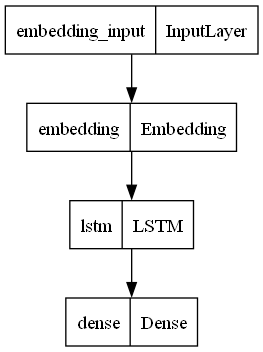

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model,to_file='plot.png',show_layer_names=True)



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x, y, epochs=50, verbose=1)

Epoch 1/50
3176/3176 [==============================] - 122s 38ms/step - loss: 6.2683 - accuracy: 0.0748
Epoch 2/50
3176/3176 [==============================] - 115s 36ms/step - loss: 5.5240 - accuracy: 0.1253
Epoch 3/50
3176/3176 [==============================] - 107s 34ms/step - loss: 5.1112 - accuracy: 0.1514
Epoch 4/50
3176/3176 [==============================] - 111s 35ms/step - loss: 4.7673 - accuracy: 0.1718
Epoch 5/50
3176/3176 [==============================] - 121s 38ms/step - loss: 4.4523 - accuracy: 0.1903
Epoch 6/50
3176/3176 [==============================] - 116s 37ms/step - loss: 4.1532 - accuracy: 0.2108
Epoch 7/50
3176/3176 [==============================] - 112s 35ms/step - loss: 3.8692 - accuracy: 0.2397
Epoch 8/50
3176/3176 [==============================] - 111s 35ms/step - loss: 3.6033 - accuracy: 0.2709
Epoch 9/50
3176/3176 [==============================] - 110s 35ms/step - loss: 3.3534 - accuracy: 0.3053
Epoch 10/50
3176/3176 [==============================] 

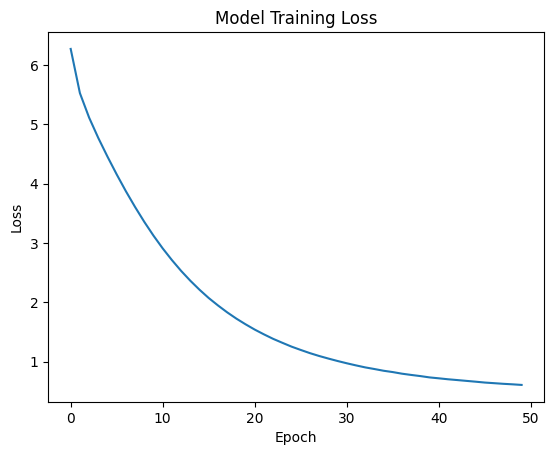

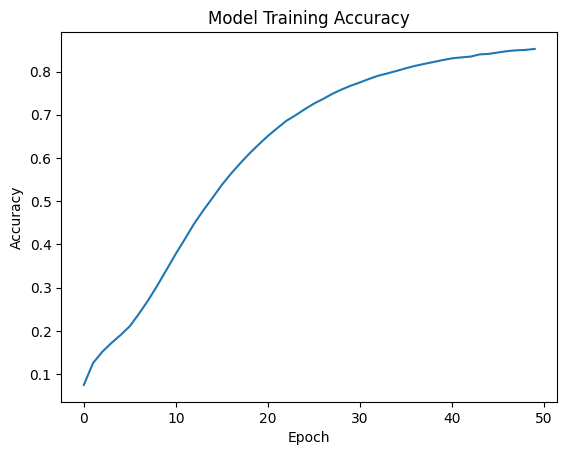

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plotting training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
def generate_next_words(seed_text, num_words, model, max_sequence_length, tokenizer):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Test the model
seed_text = input("text:")
generated_text = generate_next_words(seed_text, num_words=5, model=model, max_sequence_length=max_sequence_len, tokenizer=tokenizer)
print(generated_text)

text:Project Gutenberg's
Project Gutenberg's the adventures of sherlock holmes
